<a href="https://colab.research.google.com/github/nehxxa/Symbiosis_training_programs/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
x = [[0,0],[1,1]]
y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
clf.predict([[2,2]])

array([1])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X,y= load_iris(return_X_y = True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

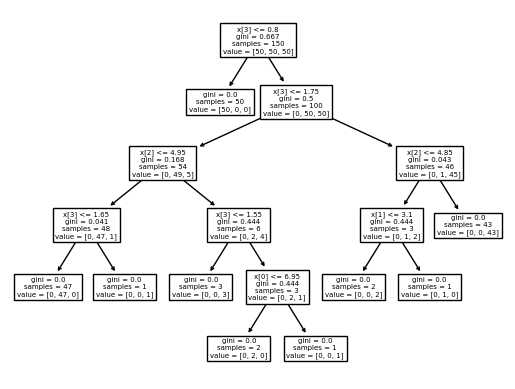

In [ ]:
tree.plot_tree(clf.fit(iris.data, iris.target))

###Two commonly used impurity criteria are the entropy and Gini index, shown below:

$$I_{\text{Entropy}} = - \sum_{i=1}^{c} p_i \log_2 p_i$$

$$I_{\text{Gini}} = 1 - \sum_{i=1}^{c} p_i^2$$

Gini impurity can only be used for classification problems (categorical target variable). Here,
is the proportions of observations that belongs to class for a particular node.

In [ ]:
import pandas as pd
cat_1 = ['I', 'I', 'I', 'I', 'I', 'I', 'II', 'II', 'II', 'III', 'III', 'I', 'I']
cat_2 = ['A', 'A', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 'C', 'A', 'B']
cat_3 = ['2', '2', '1', '2', '1', '1', '2', '1', '2', '1', '1', '2', '2']
target = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes','Yes']
df = pd.DataFrame({
    'CAT1':cat_1,
    'CAT2':cat_2,
    'CAT3':cat_3,
    'Target':target
})

**Shannon entropy** is a measure of information. When we
only have the data set and have not constructed a decision tree, our entropy (a measure of
missing information) is high and our information is low. We need to gain information and
decrease entropy (decrease the amount of missing knowledge about our target in this case). To
understand this equation, we view our example from above.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]
# Extract feature indices from the trained classifier
feature = clf.tree_.feature
threshold = clf.tree_.threshold

print('Rules used to predict sample (id): \n'.format(id=sample_id))
for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue

    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample (id): 

decision node 0 : (X_test[0, 3] = 1.2) > 0.800000011920929)
decision node 2 : (X_test[0, 3] = 1.2) <= 1.75)
decision node 3 : (X_test[0, 2] = 4.7) <= 4.950000047683716)
decision node 4 : (X_test[0, 3] = 1.2) <= 1.6500000357627869)


* children_left[i]: id of the left child of node i or -1 if leaf node

* children_right[i]: id of the right child of node i or -1 if leaf node

* feature[i]: feature used for splitting node i

* threshold[i]: threshold value at node i

* n_node_samples[i]: the number of training samples reaching node i

* impurity[i]: the impurity at node i

* weighted_n_node_samples[i]: the weighted number of training samples reaching node i

* value[i, j, k]: the summary of the training samples that reached node i for output j and class k (for regression tree, class is set to 1).





In [ ]:
def freq_sort(nums):
    count = 0
    dict1 = {}
    list1 =[]
    for i in range (len(nums)):
        for j in range (len(nums)):
            if nums[i]==nums[j]:
                count+=1
        dict1[nums[i]]=count
        count=0
    list1 = dict1.values
    print(list1)

nums = [1,1,2,2,2,3]
result = freq_sort(nums)
print(result)

<built-in method values of dict object at 0x7b0f0174d780>
None


In [ ]:
import numpy as np
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 17 nodes and has the following tree structure:

node=0 is a split node with value=[[50. 50. 50.]]: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value=[[50.  0.  0.]].
	node=2 is a split node with value=[[ 0. 50. 50.]]: go to node 3 if X[:, 3] <= 1.75 else to node 12.
		node=3 is a split node with value=[[ 0. 49.  5.]]: go to node 4 if X[:, 2] <= 4.950000047683716 else to node 7.
			node=4 is a split node with value=[[ 0. 47.  1.]]: go to node 5 if X[:, 3] <= 1.6500000357627869 else to node 6.
				node=5 is a leaf node with value=[[ 0. 47.  0.]].
				node=6 is a leaf node with value=[[0. 0. 1.]].
			node=7 is a split node with value=[[0. 2. 4.]]: go to node 8 if X[:, 3] <= 1.550000011920929 else to node 9.
				node=8 is a leaf node with value=[[0. 0. 3.]].
				node=9 is a split node with value=[[0. 2. 1.]]: go to node 10 if X[:, 0] <= 6.949999809265137 else to node 11.
					node=10 is a leaf node with value=[[0. 2

# PCA

Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009, depending on the shape of the input data and the number of components to extract.

With sparse inputs, the ARPACK implementation of the truncated SVD can be used (i.e. through scipy.sparse.linalg.svds). Alternatively, one may consider TruncatedSVD where the data are not centered.

In [ ]:
n_components = 'mle'
n_samples, n_features = X.shape

In [ ]:
n_components == min(n_samples, n_features)

False

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import mpl_toolkits.mplot3d
import numpy as np

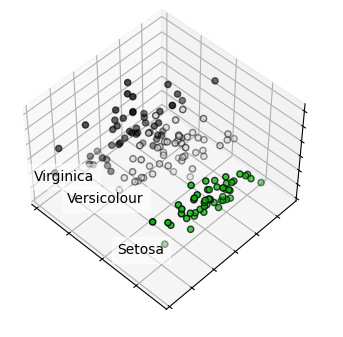

In [ ]:
from sklearn import datasets, decomposition
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.set_position([0,0,0.95,1])

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X= pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment= "center",
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y = np.choose(y,[1,2,0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2],
              color=y.astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

# IPCA

Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

This example serves as a visual check that IPCA is able to find a similar projection of the data to PCA (to a sign flip), while only processing a few samples at a time. This can be considered a “toy example”, as IPCA is intended for large datasets which do not fit in main memory, requiring incremental approaches.

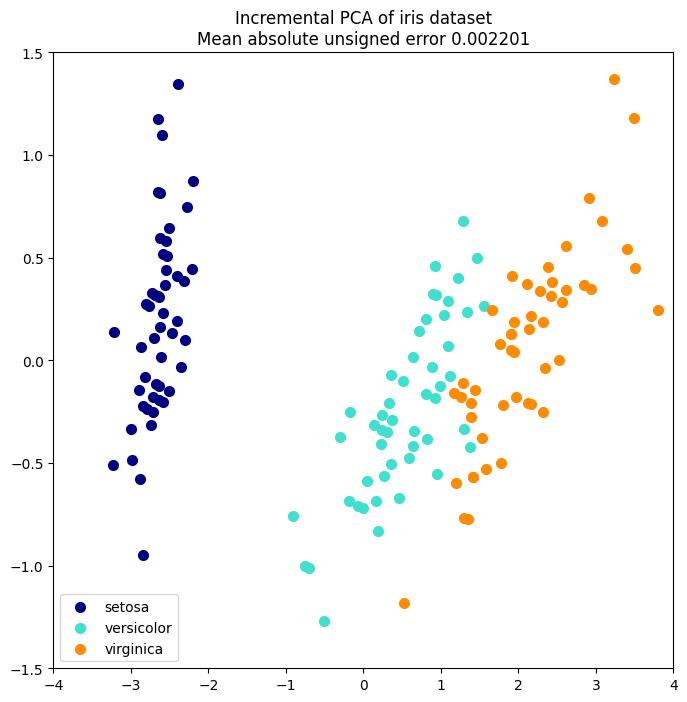

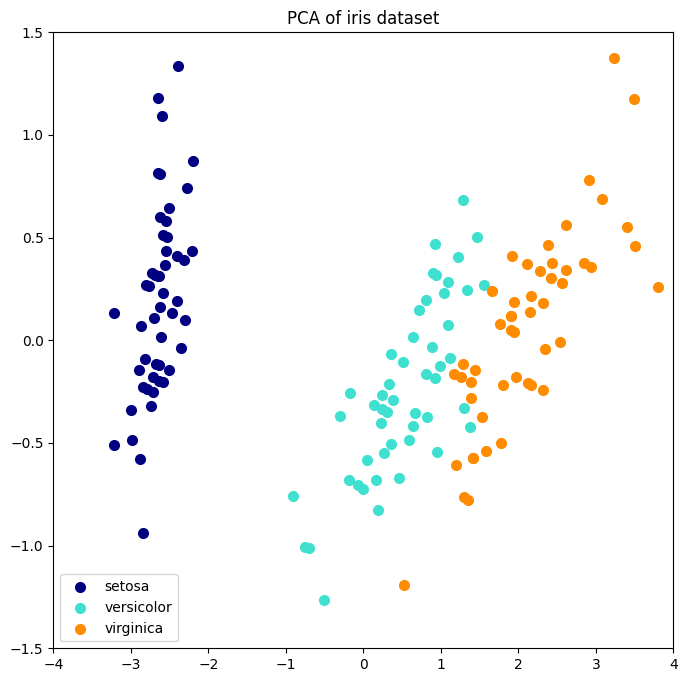

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [ ]:
y = y.astype(str)
fig = px.scatter(x=X_pca[:,0],
                 y=X_pca[:,1],
                 color=y,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

# Decision Tree using Weather Data

In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/daily_weather.csv")

In [4]:
df.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [5]:
df.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [8]:
df['air_pressure_9am'] = df['air_pressure_9am'].fillna(df['air_pressure_9am'].mean())

In [10]:
columns = df.columns

In [11]:
for i in columns:
  if df[i].isnull().sum()>0:
    df[i] = df[i].fillna(df[i].mean())

In [12]:
df.isnull().sum()

number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [13]:
clean_data = df.copy()

In [15]:
clean_data['high_humidity_level'] = (clean_data['relative_humidity_3pm']> 24.99)*1
# if statement executed without (*1) the values are in boolean
print(clean_data['high_humidity_level'])


0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_level, Length: 1095, dtype: int64


# 9am sensor signals to predict humidity at 3pm

In [16]:
morning_sensors = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [17]:
X = clean_data[morning_sensors].copy()

In [18]:
clean_data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_level
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000,1
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000,1
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000,1
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000,1


In [19]:
y = clean_data['high_humidity_level'].copy()

In [20]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [22]:
y

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_level, Length: 1095, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn import tree
humidity_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state = 0)
humidity_classifier = humidity_classifier.fit(X_train,y_train)


In [25]:
y_pred = humidity_classifier.predict(X_test)

[Text(0.5, 0.9, 'x[8] <= 23.091\ngini = 0.5\nsamples = 733\nvalue = [364, 369]'),
 Text(0.3125, 0.7, 'x[0] <= 918.82\ngini = 0.224\nsamples = 366\nvalue = [319, 47]'),
 Text(0.25, 0.5, 'x[4] <= 194.65\ngini = 0.459\nsamples = 101\nvalue = [65, 36]'),
 Text(0.125, 0.3, 'x[8] <= 20.767\ngini = 0.402\nsamples = 79\nvalue = [57, 22]'),
 Text(0.0625, 0.1, 'gini = 0.327\nsamples = 68\nvalue = [54, 14]'),
 Text(0.1875, 0.1, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.375, 0.3, 'x[5] <= 2.918\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.3125, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4375, 0.1, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.375, 0.5, 'gini = 0.08\nsamples = 265\nvalue = [254, 11]'),
 Text(0.6875, 0.7, 'x[8] <= 32.005\ngini = 0.215\nsamples = 367\nvalue = [45, 322]'),
 Text(0.5625, 0.5, 'x[4] <= 154.7\ngini = 0.464\nsamples = 93\nvalue = [34, 59]'),
 Text(0.5, 0.3, 'gini = 0.491\nsamples = 44\nvalue = [25, 19]'),
 Text(0.625, 0.3,

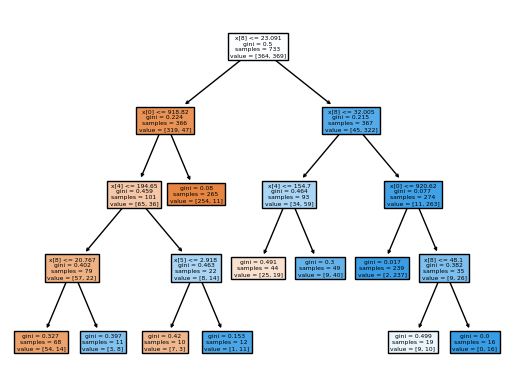

In [31]:
tree.plot_tree(humidity_classifier,filled= True)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8895027624309392

In [33]:
confusion_matrix(y_test,y_pred)

array([[167,  17],
       [ 23, 155]])

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [44]:
clf.score(X_test, y_test)

0.914364640883978

In [41]:
random_pred = clf.predict(X_test)

In [48]:
confusion_matrix(y_test, random_pred)

array([[164,  20],
       [ 19, 159]])